<a href="https://colab.research.google.com/github/zuulaika/Projet-python/blob/main/Orientation-politique_mod%C3%A9lisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install cartiflette

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 6.4 MB/s eta 0:00:00


In [18]:
import geopandas as gpd
from cartiflette import carti_download

def load_and_reproject_departements():
    # Télécharge les limites des départements français pour l'année 2022.
    departements = carti_download(
        values="France",
        crs=4326,
        borders="DEPARTEMENT",
        vectorfile_format="geojson",
        filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
        source="EXPRESS-COG-CARTO-TERRITOIRE",
        year=2022,
    )
    # Reprojecte les données géographiques des départements vers le système de coordonnées Lambert 93 (EPSG:2154).
    departements_lambert93 = departements.to_crs(epsg=2154)
    return departements_lambert93


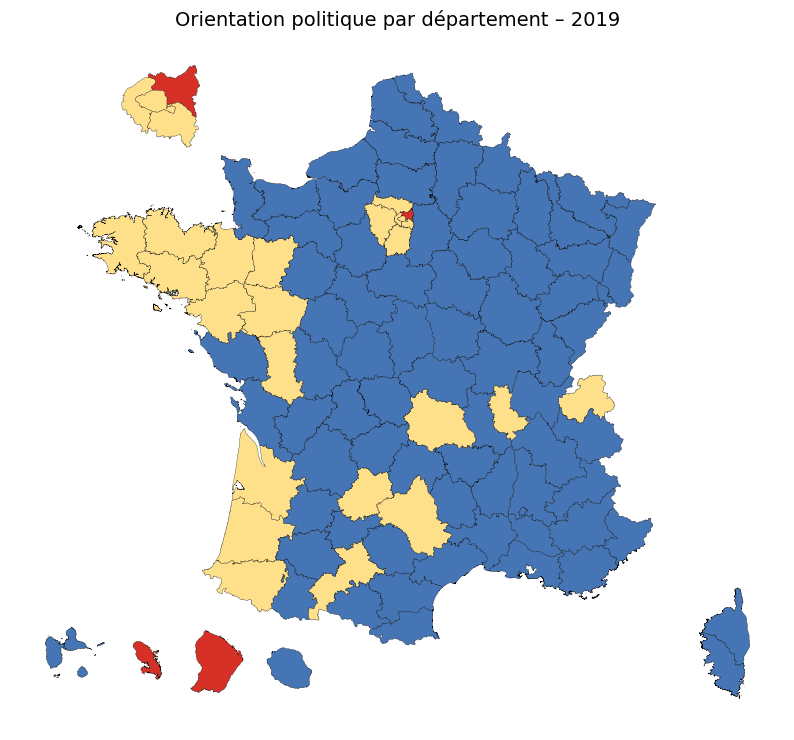

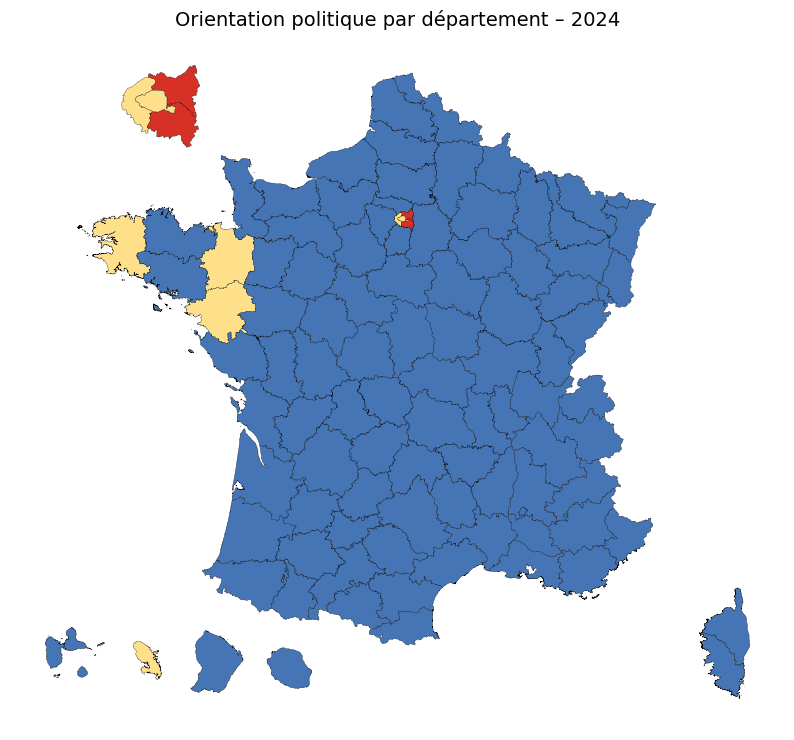

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartiflette

# Chargement données électorales
df19 = pd.read_csv("ee_bp19.csv")
df24 = pd.read_csv("ee_bp24.csv")

def orientation(row):
    if row["G"] >= row["C"] and row["G"] >= row["D"]:
        return "Gauche"
    elif row["C"] >= row["G"] and row["C"] >= row["D"]:
        return "Centre"
    else:
        return "Droite"

df19["Orientation"] = df19.apply(orientation, axis=1)
df24["Orientation"] = df24.apply(orientation, axis=1)

# Chargement des données géographiques des départements français en utilisant la fonction fournie
departements = load_and_reproject_departements()

# Jointures

gdf19 = departements.merge(df19, left_on="LIBELLE_DEPARTEMENT", right_on="Dep")
gdf24 = departements.merge(df24, left_on="LIBELLE_DEPARTEMENT", right_on="Dep")


# Cartes
colors = {
    "Gauche": "#d73027",
    "Centre": "#fee08b",
    "Droite": "#4575b4"
}

def plot_map(gdf, year):
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(
        # Removed 'column="Orientation"' to avoid UserWarning since 'color' is explicitly set
        categorical=True,
        legend=True,
        color=gdf["Orientation"].map(colors),
        linewidth=0.2,
        edgecolor="black",
        ax=ax
    )
    ax.set_title(f"Orientation politique par département – {year}", fontsize=14)
    ax.axis("off")
    plt.show()

plot_map(gdf19, 2019)
plot_map(gdf24, 2024)

## Légende des Cartes d'Orientation Politique

*   **Rouge (#d73027)** : Orientation **Gauche**
*   **Jaune (#fee08b)** : Orientation **Centre**
*   **Bleu (#4575b4)** : Orientation **Droite**

## Interprétation des Cartes 2019 et 2024

Les cartes montrent l'orientation politique dominante par département pour les élections de 2019 et 2024. Une observation rapide révèle un déplacement notable vers la Droite dans de nombreux départements entre ces deux périodes. En 2019, la répartition entre les trois orientations semblait plus équilibrée, avec une présence significative du Centre et de la Gauche dans certaines régions. Cependant, en 2024, les départements colorés en bleu (Droite) sont devenus beaucoup plus prédominants, indiquant une forte progression de cette orientation sur l'ensemble du territoire français. Le Centre et la Gauche apparaissent désormais plus fragmentés et moins étendus géographiquement.